<a href="https://colab.research.google.com/github/rginorio/Movie-Correlation-Project-in-Python/blob/main/Movie_Correlation_Project_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Analyst Portfolio Project | Correlation in Python

In [ ]:
#import libraries
import pandas as pd
import seaborn as sns
import numpy as np


import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

#Read in the data

from google.colab import files
uploaded = files.upload()

import io
df2 = pd.read_excel(io.BytesIO(uploaded['movies.xlsx']))
# Dataset is now stored in a Pandas Dataframe

  




Saving movies.xlsx to movies.xlsx


In [ ]:
#let's look at the data
df2.head()

,name,rating,genre,year,released,Country released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980.0,1980-06-13 00:00:00,United States,8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980.0,1980-07-02 00:00:00,United States,5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980.0,1980-06-20 00:00:00,United States,8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980.0,1980-07-02 00:00:00,United States,7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980.0,1980-07-25 00:00:00,United States,7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344,Orion Pictures,98.0


In [ ]:
#Let's see if there is any missing data

for col in df2.columns:
  pct_missing = np.mean(df2[col].isnull())
  print('{} - {}%'.format(col, pct_missing))

name - 0.00013039509714434736%
rating - 0.010170817577259095%
genre - 0.00013039509714434736%
year - 0.00013039509714434736%
released - 0.00039118529143304214%
Country released - 0.00039118529143304214%
score - 0.0005215803885773895%
votes - 0.0005215803885773895%
director - 0.00013039509714434736%
writer - 0.0005215803885773895%
star - 0.0002607901942886947%
country - 0.0005215803885773895%
budget - 0.00013039509714434736%
gross - 0.0%
company - 0.0023471117485982526%
runtime - 0.0006519754857217369%


In [ ]:
# Change data type of columns
df2['budget'] = df2['budget'].fillna(0).astype('int')


In [ ]:
df2['gross'] = pd.to_numeric(df2['gross'], errors='coerce'). astype('Int64')
df2['gross'] = df2['gross'].fillna(0).astype('int')


In [ ]:
# Data types for our columns
df2.dtypes

name                 object
rating               object
genre                object
year                float64
released             object
Country released     object
score               float64
votes               float64
director             object
writer               object
star                 object
country              object
budget                int64
gross                 Int64
company              object
runtime             float64
yearcorrect          object
dtype: object

In [ ]:
df2.head()

,name,rating,genre,year,released,Country released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009.0,0,56,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,0
7445,535,5,0,2019.0,1,56,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,1
3045,6896,5,6,1997.0,2,56,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,2
6663,5144,5,0,2015.0,3,56,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,3
7244,536,5,0,2018.0,4,56,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,4


In [ ]:
#Create correct Year Column
df2['yearcorrect'] = df2['released'].astype(str).str[:4]
df2.head()

,name,rating,genre,year,released,Country released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009.0,0,56,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,0
7445,535,5,0,2019.0,1,56,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,1
3045,6896,5,6,1997.0,2,56,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,2
6663,5144,5,0,2015.0,3,56,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,3
7244,536,5,0,2018.0,4,56,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,4


In [ ]:
df2= df2.sort_values(by=['gross'], inplace=False, ascending=False )

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
#Drop any duplicates
df2['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3698                              Zentropa Entertainments
1175                                 Zenith Entertainment
5180                                    Zazen ProduÃ§Ãµes
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

In [ ]:
df2.head()

,name,rating,genre,year,released,Country released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009.0,0,56,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,535,5,0,2019.0,1,56,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,6896,5,6,1997.0,2,56,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,5144,5,0,2015.0,3,56,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018.0,4,56,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38


In [ ]:
# Budget high correlation
# Company high correlation


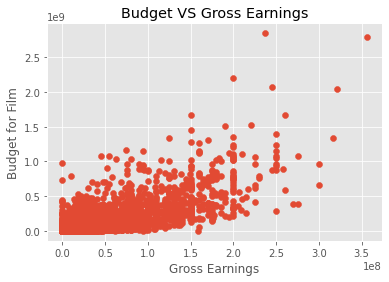

In [ ]:
# Scatter plot with budget vs gross

plt.scatter(x=df2['budget'], y=df2['gross'])
plt.title('Budget VS Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()


In [ ]:
df2.head()

,name,rating,genre,year,released,Country released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009.0,2009-12-18 00:00:00,United States,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019.0,2019-04-26 00:00:00,United States,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997.0,1997-12-19 00:00:00,United States,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015.0,2015-12-18 00:00:00,United States,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018.0,2018-04-27 00:00:00,United States,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


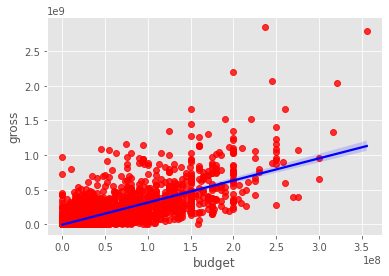

In [ ]:
#Plot Budget vs Gross using Seaborn

sns.regplot(x='budget', y='gross', data=df2, scatter_kws={'color': 'red'}, line_kws={'color':'blue'})

In [ ]:
# Looking at correlation

In [ ]:
df2.corr(method='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750165,0.269510
gross,0.261900,0.186392,0.632834,0.750165,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


In [ ]:
# High correlation between budget and gross

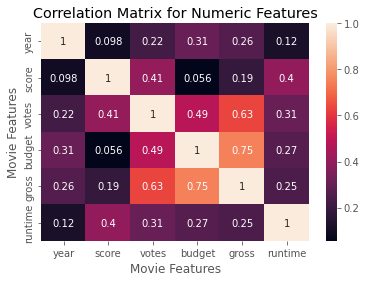

In [ ]:
correlation_matrix = df2.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()


In [ ]:
# Look at Company

df2.head()

,name,rating,genre,year,released,Country released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009.0,2009-12-18 00:00:00,United States,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019.0,2019-04-26 00:00:00,United States,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997.0,1997-12-19 00:00:00,United States,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015.0,2015-12-18 00:00:00,United States,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018.0,2018-04-27 00:00:00,United States,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [ ]:
df2_numerized = df2

for col_name in df2_numerized.columns:
  if(df2_numerized[col_name].dtype == 'object'):
    df2_numerized[col_name] = df2_numerized[col_name].astype('category')
    df2_numerized[col_name] = df2_numerized[col_name].cat.codes

df2_numerized.head()

,name,rating,genre,year,released,Country released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,533,5,0,2009.0,0,56,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,29
7445,535,5,0,2019.0,1,56,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,39
3045,6896,5,6,1997.0,2,56,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,17
6663,5144,5,0,2015.0,3,56,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,35
7244,536,5,0,2018.0,4,56,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,38


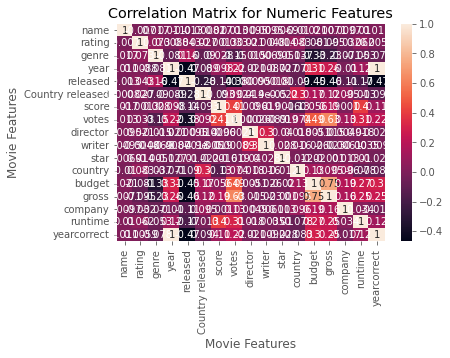

In [ ]:
correlation_matrix = df2_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [ ]:
df2_numerized.corr()

,name,rating,genre,year,released,Country released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.006981,0.016707,0.011440,-0.013486,-0.000819,0.017096,0.013082,0.009469,0.009456,0.006852,-0.009976,0.020689,0.007083,0.009671,0.010396,0.010704
rating,-0.006981,1.000000,0.073337,0.008779,0.043014,0.026994,-0.001314,0.033225,0.020542,-0.004833,0.014442,0.083110,-0.081411,-0.095023,-0.031657,0.062145,0.005921
genre,0.016707,0.073337,1.000000,-0.081261,0.162845,-0.090303,0.027965,-0.145307,-0.014863,0.006947,-0.005098,-0.036854,-0.333806,-0.234149,-0.070597,-0.052711,-0.077919
year,0.011440,0.008779,-0.081261,1.000000,-0.468539,-0.089289,0.097995,0.222945,-0.020795,-0.008654,-0.027242,-0.070938,0.309212,0.261900,-0.010431,0.120811,0.997295
released,-0.013486,0.043014,0.162845,-0.468539,1.000000,-0.284146,-0.138931,-0.384216,0.000946,-0.000178,0.010130,-0.090204,-0.453632,-0.457600,-0.113216,-0.171693,-0.465344
Country released,-0.000819,0.026994,-0.090303,-0.089289,-0.284146,1.000000,-0.092763,0.092014,0.014471,-0.000049,-0.022367,0.298837,0.167048,0.119420,0.095095,-0.012612,-0.094373
score,0.017096,-0.001314,0.027965,0.097995,-0.138931,-0.092763,1.000000,0.409182,0.009559,0.019415,-0.001609,-0.133348,0.055665,0.186392,0.001030,0.399451,0.105601
votes,0.013082,0.033225,-0.145307,0.222945,-0.384216,0.092014,0.409182,1.000000,0.000260,0.000892,-0.019282,0.073625,0.486862,0.632834,0.133204,0.309212,0.218364
director,0.009469,0.020542,-0.014863,-0.020795,0.000946,0.014471,0.009559,0.000260,1.000000,0.299351,0.039617,0.018242,0.005128,-0.014805,0.004866,0.017624,-0.020852
writer,0.009456,-0.004833,0.006947,-0.008654,-0.000178,-0.000049,0.019415,0.000892,0.299351,1.000000,0.027628,0.016090,-0.025754,-0.022885,0.006102,-0.003512,-0.009219


In [ ]:
correlation_mat = df2_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs

name              name                1.000000
                  rating             -0.006981
                  genre               0.016707
                  year                0.011440
                  released           -0.013486
                  Country released   -0.000819
                  score               0.017096
                  votes               0.013082
                  director            0.009469
                  writer              0.009456
                  star                0.006852
                  country            -0.009976
                  budget              0.020689
                  gross               0.007083
                  company             0.009671
                  runtime             0.010396
                  yearcorrect         0.010704
rating            name               -0.006981
                  rating              1.000000
                  genre               0.073337
                  year                0.008779
             

In [ ]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

released          year               -0.468539
year              released           -0.468539
yearcorrect       released           -0.465344
released          yearcorrect        -0.465344
                  gross              -0.457600
gross             released           -0.457600
budget            released           -0.453632
released          budget             -0.453632
                  votes              -0.384216
votes             released           -0.384216
genre             budget             -0.333806
budget            genre              -0.333806
released          Country released   -0.284146
Country released  released           -0.284146
genre             gross              -0.234149
gross             genre              -0.234149
released          runtime            -0.171693
runtime           released           -0.171693
genre             votes              -0.145307
votes             genre              -0.145307
released          score              -0.138931
score        

In [ ]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes             gross               0.632834
gross             votes               0.632834
budget            gross               0.750165
gross             budget              0.750165
yearcorrect       year                0.997295
year              yearcorrect         0.997295
name              name                1.000000
director          director            1.000000
company           company             1.000000
gross             gross               1.000000
budget            budget              1.000000
country           country             1.000000
star              star                1.000000
writer            writer              1.000000
votes             votes               1.000000
score             score               1.000000
Country released  Country released    1.000000
released          released            1.000000
year              year                1.000000
genre             genre               1.000000
rating            rating              1.000000
runtime      

In [ ]:
# Votes and budget has the highest correlation to gross earnings
# Company has low correlation